# Exploratory Data Analysis

Exploratory Data Analysis is essentially the first step in actually working with a data set. As we gain more experience with data and the things that can happen you'll see more examples of what we are looking for. 

Two main items we are looking for:
- Can we identify features that are important in the prediction
- Can we identify features that are are related, particularly ones that are related to the outcome

Note that in both cases, we will eventually have some tools for at least to some extent automating the answering of these questions.

We have used Linear Regression a few times in making predictions, but note that sometimes the relationship is not linear, yet the same tool could be used.

The reason in identifying features that are important in the prediction is that these are the ones we will include in our algorithm, and if they are categorical, they are also the ones we will need to devote some time to decoding.

The reason for identifying features that are related, is that this then identifies features that may not contribute new independent information to our model.

Consider the abalone dataset.

In [1]:
import pandas as pa
import numpy as np
import seaborn as sn

In [2]:
ab = pa.read_csv('Data Sets/Abalone/abalone.csv', 
                 names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight',
                                          'Rings'])

ab.head()

,Sex,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


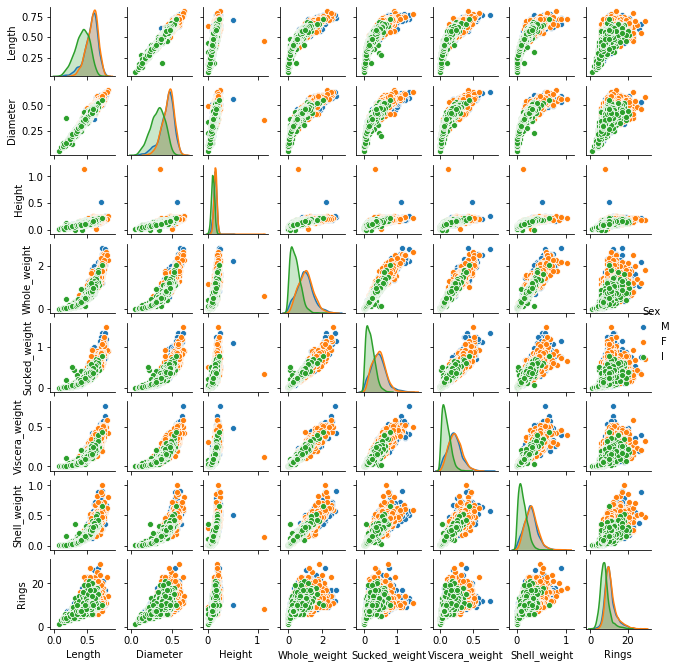

In [3]:
p = sn.pairplot(ab, hue = 'Sex')
p.fig.set_size_inches(9, 9)

You might notice from the pairplots that it looks like there is a linear relationship between Length, Diameter, and Height. It is relatively robust. In fact we could apply our LinearRegression tool to it. 

In [4]:
import matplotlib.pyplot as plt
import numpy.random as rn
from sklearn.linear_model import LinearRegression

In [5]:
# Produce a numpy array with the Length variable and another with the Diameter

X = np.atleast_2d(np.array([float(h) for h in ab.loc[:, 'Diameter']])).transpose()
# Recall that we need an array of shape (n, 1) and so there are some numpy.array manipulations needed

y = np.array(ab.loc[:, 'Length'])

In [6]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [7]:
reg = LinearRegression().fit(X_train, y_train)
b, m = reg.intercept_, *reg.coef_
b, m

(0.03810541331481182, 1.1910016964551684)

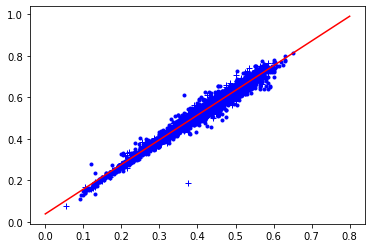

In [8]:
plt.plot(X_train, y_train, 'b.')
plt.plot(X_test, y_test, 'b+')
xx = np.linspace(0, 0.8, 50)
yy = b + m*xx
plt.plot(xx, yy, 'r-');

In [9]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.9743276375812088
The testing R2: 0.9717722568405255


These are relatively close to one, implying that the line does a reasonable job of explaining the variation in the data.

## Nonlinear Relations

Notice that a relationship between length and whole weight appears to exist, but that it is non-linear.

In [56]:
# Produce a numpy array with the Length variable and another with the Whole_Weight

X = np.atleast_2d(np.array([float(h) for h in ab.loc[:, 'Length']])).transpose()
# Recall that we need an array of shape (n, 1) and so there are some numpy.array manipulations needed

y = np.array(ab.loc[:, 'Whole_weight'])

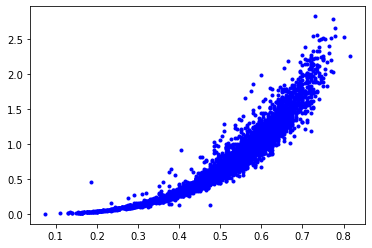

In [57]:
plt.plot(X, y, 'b.');

We could try using a quadratic relation such as $y = a x^2 + b x + c$. We could even do this with our existing Linear Regression tool by creating a new column with the values of $x^2$.

In [58]:
X2 = np.atleast_2d(np.array([x**2 for x in X]))
X = np.concatenate([X, X2], axis=1)

In [59]:
X[:10]

array([[0.455   , 0.207025],
       [0.35    , 0.1225  ],
       [0.53    , 0.2809  ],
       [0.44    , 0.1936  ],
       [0.33    , 0.1089  ],
       [0.425   , 0.180625],
       [0.53    , 0.2809  ],
       [0.545   , 0.297025],
       [0.475   , 0.225625],
       [0.55    , 0.3025  ]])

In [60]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [61]:
reg = LinearRegression().fit(X_train, y_train)

In [62]:
c, b, a = reg.intercept_, *reg.coef_
c, b, a

(0.4465389216286053, -3.2825531868932525, 7.275878178000219)

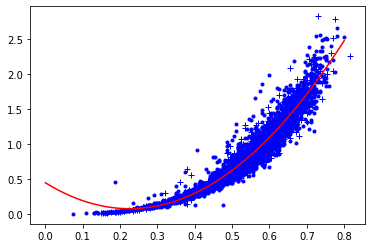

In [63]:
plt.plot(X_train[:, 0], y_train, 'b.')
plt.plot(X_test[:, 0], y_test, 'b+')
xx = np.linspace(0, 0.8, 50)
yy = a*xx**2 + b*xx + c
plt.plot(xx, yy, 'r-');

In [64]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.9324862119840669
The testing R2: 0.9272305124767107


Worth noting that the quadratic relation we found seems to breakdown substantially for Lengths less than 0.2. It might be worth exploring a different type of non-linear model. For example an exponential model might describe the data: $ y = e^{m x +b}$. 

To modify our dataset so that we can apply the Linear Regression tool with this relation, we transform the equation by taking the logarithm of both sides: $ \log(y) = m x + b$. 

In [67]:
X = np.atleast_2d(np.array([float(h) for h in ab.loc[:, 'Length']])).transpose() # Reseting X
y = np.array(ab.loc[:, 'Whole_weight'])  # Reseting y
logy = np.log(y)  # Simple enough to transform the y values with log.

Sidenote: If you are new to a programing language, it is always worth checking what the base of the log function is. [numpy.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) We see here that numpy.log refers to the natural logarithm which is what we want.

In [68]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
logy = logy[perm]
y = y[perm]   # Note that I am shuffling both y and logy, this will allow us to use y in plots
# If we did not shuffle y in the same ways at X we would have a problem.
X_test = X[:test]       # Then create the test
logy_test = logy[:test]
y_test = y[:test]
X_train = X[test:]     # and train sets
logy_train = logy[test:]
y_train = y[test:]

In [69]:
reg = LinearRegression().fit(X_train, logy_train)

In [70]:
b, m = reg.intercept_, *reg.coef_
b, m

(-3.963695520701095, 6.724647571594421)

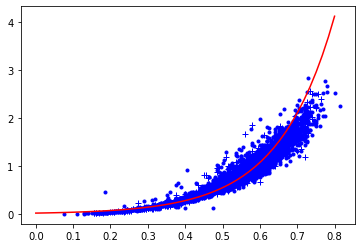

In [71]:
plt.plot(X_train[:, 0], y_train, 'b.')
plt.plot(X_test[:, 0], y_test, 'b+')
xx = np.linspace(0, 0.8, 50)
yy = np.exp(m*xx + b)
plt.plot(xx, yy, 'r-');

In [72]:
print('The training R2: {}'.format(reg.score(X_train, logy_train))) 
# first we can compute the R2 score from the LinearRegression method. However note that this is 
# really working from the log error, so it is not comparable to the errors above.
print('The testing R2: {}'.format(reg.score(X_test, logy_test)))

The training R2: 0.9322667524941314
The testing R2: 0.9395629727215006


In [73]:
yhat_train = np.exp(reg.predict(X_train))
yhat_test = np.exp(reg.predict(X_test))
y_train_mean = np.mean(y_train)
y_test_mean = np.mean(y_test)
EV_train = sum( (yhat_train - y_train)**2 )
EV_test = sum( (yhat_test - y_test)**2 )
TV_train = sum( (y_train - y_train_mean)**2 )
TV_test = sum( (y_test - y_test_mean)**2 )
R2_train = 1 - EV_train/TV_train
R2_test = 1 - EV_test/TV_test

In [74]:
print('The training R2: {}'.format(R2_train))
print('The testing R2: {}'.format(R2_test))

The training R2: 0.8338421806085136
The testing R2: 0.8617863264102406


Why is it so far off from the $R^2$ values we had for the quadratic model, even though the qualitative part of the model looks better? The problem is that the LinearRegression method is designed to maximize the $R^2$ for the $X$ and $y$ values it is passed, and for this model that means it maximized the values for the $\log(y)$ values.

The problem is that the LinearRegression is then overvaluing data points with small values of $y$ because in the transformation to $\log(y)$ they become large negative values.

The solution is to using a weight $w$ passed to LinearRegression that is proportional to the value of $y$ rather than the default equal weight.

In [91]:
reg = LinearRegression().fit(X_train, logy_train, sample_weight=y_train)

In [92]:
b, m = reg.intercept_, *reg.coef_
b, m

(-3.293457107496078, 5.581497615436184)

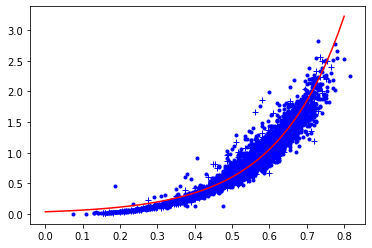

In [93]:
plt.plot(X_train[:, 0], y_train, 'b.')
plt.plot(X_test[:, 0], y_test, 'b+')
xx = np.linspace(0, 0.8, 50)
yy = np.exp(m*xx + b)
plt.plot(xx, yy, 'r-');

In [94]:
yhat_train = np.exp(reg.predict(X_train))
yhat_test = np.exp(reg.predict(X_test))
y_train_mean = np.mean(y_train)
y_test_mean = np.mean(y_test)
EV_train = sum( (yhat_train - y_train)**2 )
EV_test = sum( (yhat_test - y_test)**2 )
TV_train = sum( (y_train - y_train_mean)**2 )
TV_test = sum( (y_test - y_test_mean)**2 )
R2_train = 1 - EV_train/TV_train
R2_test = 1 - EV_test/TV_test

In [95]:
print('The training R2: {}'.format(R2_train))
print('The testing R2: {}'.format(R2_test))

The training R2: 0.9171692315695774
The testing R2: 0.9251117906446126


Summarizing what we have learned:
- There is a linear relationship between Length and Diameter, which implies that we may be able to drop one of these variables from further analysis with little penalty.
- There is a non-linear relationship between Length and Whole_weight, which implies that we may be able to drop one of these variables except if we use Linear Models we may need to include the quadratic term or another transformation of the variables (exponential or logarithmic).

The point with this last bullet is that if the relationship is non-linear it will not be captured by the Linear Regression model we are using without additional transformations.

# Linear Regression

We have been putting off for the last few chapters the question of what Linear Regression is doing exactly and how Python is computing the parameters. There are two points of view on the problem, and interestingly they both lead to the same answer. 

Firstly what we are trying to do with Linear Regression is minimize the *Explained Variation* of the problem:

$$ \mbox{Explained Variation} = \sum_{j=1}^n (\hat{y}_j - y_j)^2 $$

using $\hat{y}_j = m x_j + b$ where $(x_j, y_j)$ are the samples in our training set.  Thus we should think of this sum as a function of $m$ and $b$, and our goal is to find the values of $m$ and $b$ that minimize the result.

## Calculus Approach to Linear Regression

$$ F(m, b) = \sum_{j=1}^n (b + m x_j - y_j )^2 $$

One way to locate this minimum is to use a method you might have learned in Calculus. We are looking for the location(s) where the derivatives of $F$ in the direction of $m$ and $b$ are both zero. That is, the minimum should be at one of the points where the value of the function no longer changes if we move $m$ or $b$ by a little bit.

(note I will now use some Calculus techniques, if you have not taken Calculus you can skip this and pick up with us when we get to the other approach.)

Because $F(m, b)$ is a quadratic function in both $m$ and $b$, we know that the derivatives $\frac{\partial F}{\partial m}$ and $\frac{\partial F}{\partial b}$ are linear functions. This is nice as it implies that there is a unique solution $(m_0, b_0)$ that solves for each of them to be zero. It also means that we will be able to use Linear Algebra techniques to automate solving the equations and implmenting it in a computer program. Specifically the equations we are solving are:

$$ \frac{\partial F}{\partial m} = \sum_{j=1}^n 2 x_j (b + m x_j - y_j) = 0 $$
and
$$ \frac{\partial F}{\partial b} = \sum_{j=1}^n 2 (b + m x_j - y_j) = 0 $$

Note also that the because the function is quadratic and for large values of $b$ and $m$ is large itself, the place where the derivatives are zero must be a minimum, and not just a local minimum but a global minimum.

Rewriting the equations as a matrix equation it looks like:

$$ A \begin{pmatrix} m \\ b \end{pmatrix} = Y $$
where 
$$ A = \begin{pmatrix} \sum_{j=1}^n 2 x_j^2 & \sum_{j=1}^n 2 x_j \\ \sum_{j=1}^n 2 x_j & 
\sum_{j=1}^n 2 \end{pmatrix} $$
and 
$$ C = \begin{pmatrix} \sum_{j=1}^n 2 x_j y_j \\ \sum_{j=1}^n 2 y_j \end{pmatrix} $$

Note that as complicated as the expressions seem, the entries in $A$ and $C$ are just numbers.

Thus giving 
$$ \begin{pmatrix} m \\ b \end{pmatrix} = A^{-1} C $$

One merely needs to check that in almost all cases the matrix $A$ will be invertible.

## Linear Regression as Projection

A different way to think about what *Linear Regression* is doing is to think of it as an orthogonal projection. Let $\{ (x_i, y_i) \}$ be the set of sample points, and then define
$$ X = \begin{pmatrix} x_0 & 1 \\ x_1 & 1 \\ \vdots & \vdots \\ x_n & 1 \end{pmatrix} $$
and 
$$ y = \begin{pmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{pmatrix}$$

We are trying to find an $m$ and $b$ such that 

$$ X \begin{pmatrix} m \\ b \end{pmatrix} = y $$

If $Y$ is in the column-space of $X$ (the linear span of the columns of $X$) then there will be a choice of $m$ and $b$ such that this is equality. However Note that the column span of $X$ will have $2$ or $1$ dimensions (**Why not zero? and When will it be 1?**); but lives in a $n$ dimensional vector space. Thus $y$ would have to be very special to be in the column space of $X$.

In most cases we expect to have an $X$ of rank 2, and a $y$ that is not in the column space of $X$. In that case, geometrically the closest solution we could fine would come from an *orthogonal projection* of $y$ into the column space of $X$. Once we have that projection there would then be a unique $m$ and $b$ that $X$ would map onto the projected $y$. **Picture of Orthogonal Projection Needed**.

There is, of course, a trick. It turns out that multiplying an $n$ vector by $X^T$ ($X$ *Transpose*), does the trick of projecting the problem to one that will have a unique solution. Multiplying both sides of the equation by $X^T$ we get:

$$ X^T X \begin{pmatrix} m\\ b\end{pmatrix} = X^T y $$

Then we can solve for $m$ and $b$ provided that $X^T X$ is invertible:

$$ \begin{pmatrix} m\\ b \end{pmatrix} = (X^T X)^{-1} X^T y  $$

We can show that provided an $X$ with more rows than columns has full rank (2 in this case) $X^T X$ will always be invertible. 

*Note that if the columns of $X$ are orthogonal, then this is just the projection formula you might have seen for orthogonal projection onto an orthogonal basis. We have just removed the step of having to use an orthogonal basis.*

*Another Note:  My linear algebra courses are built around arriving at this result, as it is absolutely fundamental to a long list of applications of Linear Algebra in mathematics, science and engineering*

### Connection

Note the connection between these two approaches. The $X^T X$ gives $A$, while $X^T y$ gives $C$.

### Higher Dimensions

Both approaches generalizes immediately to higher dimensions. The only issue is that the sample size needs to be larger than the number of columns of $X$. If the sample size is too small than we are not assured that $X^T X$ will be invertible. So in particular note that for problems using images, techniques based on Linear Regression may be difficult to use.

### Generalizations

We saw in the example above, that in order to get a better result we needed to apply weights to the sample data. This corresponds to adjusting the inner-product on the vector space, giving a different formula for orthogonal projection that would include the weights. In the Calculus interpretation of the problem, weights correspnds to making a different definition of the function being minimized. Interestingly, if done carefully both adjustments again lead to the same solution.

### Approximation / Exact Result

Finally it is worth noting that given a training dataset, Linear Regression will always produce the same result, and in fact that there is an *exact* result that achieves the minimum. The only reason our results above fluctuate (and we spent an entire class studying how they fluctuate) is because the training dataset changed. This will be in contrast to other models we learn to use in this class whose answers may change each time we run the model, or whose answers are approximations to the exact answer.